In [3]:
pip install pandas

  Using cached pandas-2.3.3-cp39-cp39-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp39-cp39-macosx_11_0_arm64.whl (10.8 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.3-py2.py3-none-any.whl (348 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
!pip install matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 277.7 kB/s  0:00:28m0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 500.3 kB/s  0:00:06 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 696.6 kB/s  0:00:06 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [seaborn]m7/9 [matplotlib]esources]

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


Data Loaded Successfully

Total Transactions: 1000000
Unique Customers: 329738

Top 5 Products:
 Product
Toothpaste    73324
Ice Cream     37094
Soap          37076
Jam           36956
Orange        36928
Name: count, dtype: int64

Transactions per City:
 City
Boston           100566
Dallas           100559
Seattle          100167
Chicago          100059
Houston          100050
New York         100007
Los Angeles       99879
Miami             99839
San Francisco     99808
Atlanta           99066
Name: count, dtype: int64

Average Spend per Customer Category:
 Customer_Category
Homemaker         52.461417
Middle-Aged       52.411318
Professional      52.525762
Retiree           52.435589
Senior Citizen    52.342672
Student           52.487994
Teenager          52.529091
Young Adult       52.448246
Name: Total_Cost, dtype: float64

Payment Preference:
 Payment_Method      Cash  Credit Card  Debit Card  Mobile Payment
Customer_Category                                                
Homem

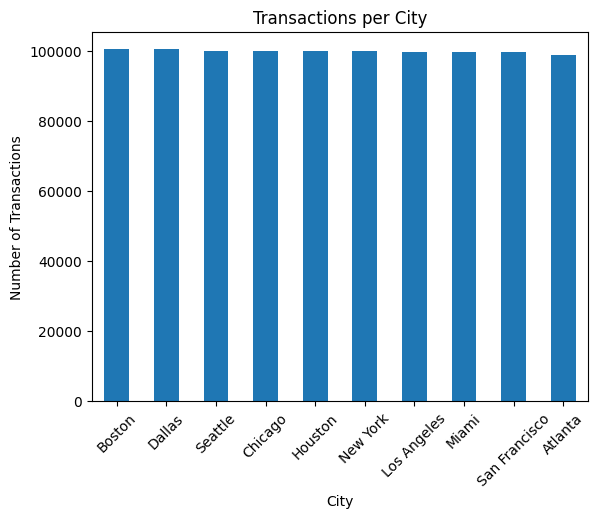

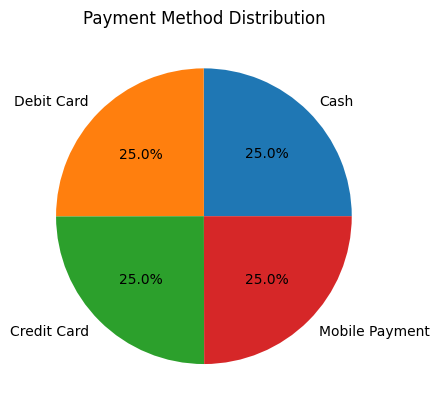

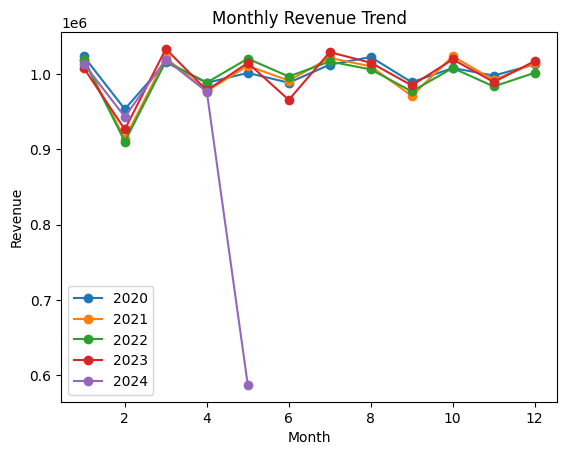

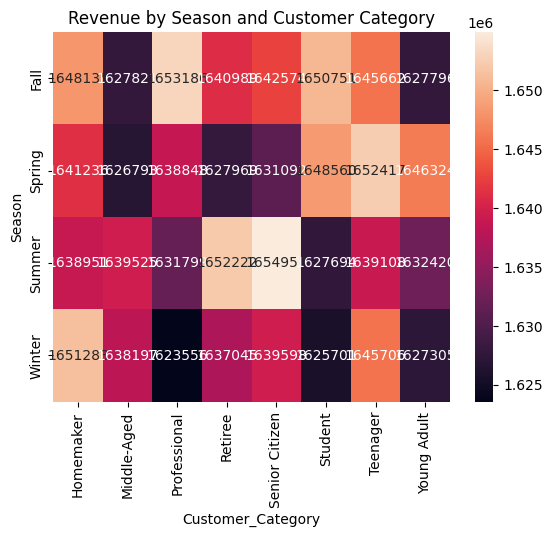


Analysis Completed Successfully


In [15]:
# ================================
# Retail Transaction Insights Project
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# -------------------------------
# Task 1: Data Preparation
# -------------------------------

# Read CSV
df = pd.read_csv("/Users/parveenisherwal/Library/Mobile Documents/com~apple~CloudDocs/AI_Study/IITM Course/Retail_Transactions_Dataset.csv")

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year, Month, DayOfWeek
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()

# Convert Product string to list
df['Product'] = df['Product'].apply(ast.literal_eval)

# Fill missing Promotion values
df['Promotion'] = df['Promotion'].fillna("No Promotion")

print("Data Loaded Successfully\n")

# -------------------------------
# Task 2: Basic Exploration
# -------------------------------

print("Total Transactions:", df.shape[0])
print("Unique Customers:", df['Customer_Name'].nunique())

# Top 5 Products
all_products = df['Product'].explode()
top_products = all_products.value_counts().head(5)

print("\nTop 5 Products:\n", top_products)

# Top Cities
top_cities = df['City'].value_counts()
print("\nTransactions per City:\n", top_cities)

# -------------------------------
# Task 3: Customer Behaviour
# -------------------------------

# Avg spend per customer category
avg_spend_category = df.groupby('Customer_Category')['Total_Cost'].mean()
print("\nAverage Spend per Customer Category:\n", avg_spend_category)

# Payment preference by category
payment_pref = pd.crosstab(df['Customer_Category'], df['Payment_Method'])
print("\nPayment Preference:\n", payment_pref)

# Avg items per store type
avg_items_store = df.groupby('Store_Type')['Total_Items'].mean()
print("\nAvg Items per Store Type:\n", avg_items_store)

# -------------------------------
# Task 4: Promotion & Discount Impact
# -------------------------------

# Discount impact
discount_impact = df.groupby('Discount_Applied')['Total_Cost'].mean()
print("\nAvg Cost (Discount vs No Discount):\n", discount_impact)

# Avg items by promotion
avg_items_promo = df.groupby('Promotion')['Total_Items'].mean()
print("\nAvg Items by Promotion:\n", avg_items_promo)

# Promotion effectiveness (Total Revenue)
promo_revenue = df.groupby('Promotion')['Total_Cost'].sum().sort_values(ascending=False)
print("\nRevenue by Promotion:\n", promo_revenue)

# -------------------------------
# Task 5: Seasonality Trends
# -------------------------------

season_revenue = df.groupby('Season')['Total_Cost'].sum()
print("\nRevenue by Season:\n", season_revenue)

# -------------------------------
# Task 6: Visualizations
# -------------------------------

plt.figure()
df['City'].value_counts().plot(kind='bar')
plt.title("Transactions per City")
plt.xlabel("City")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

plt.figure()
df['Payment_Method'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

# Monthly Revenue Trend
monthly_revenue = df.groupby(['Year', 'Month'])['Total_Cost'].sum().reset_index()

plt.figure()
for year in monthly_revenue['Year'].unique():
    data = monthly_revenue[monthly_revenue['Year'] == year]
    plt.plot(data['Month'], data['Total_Cost'], marker='o', label=year)

plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.show()

# Heatmap Revenue by Season & Customer Category
pivot_table = df.pivot_table(
    values='Total_Cost',
    index='Season',
    columns='Customer_Category',
    aggfunc='sum'
)

plt.figure()
sns.heatmap(pivot_table, annot=True, fmt=".0f")
plt.title("Revenue by Season and Customer Category")
plt.show()

print("\nAnalysis Completed Successfully")
